<a href="https://colab.research.google.com/github/myelife/devops-essentials-sample-app/blob/master/test_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course project

Used below article for the project

https://towardsdatascience.com/deep-learning-for-aircraft-recognition-part-i-building-a-cnn-from-scratch-c7ea455dbfb5


In [1]:
# Install pytorch

!pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 159.3MB 70kB/s 
     |████████████████████████████████| 11.8MB 364kB/s 
     |████████████████████████████████| 7.6MB 6.5MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [5]:
import os
import torch
import torchvision
from zipfile import ZipFile # In this project I'll use a zip file
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [6]:
# Project name

project_name='Dimi-Course Project(Aircraft)'

In [7]:
# Dowload the dataset
dataset_url = "http://testme1.ddns.net/testme1/jovian/test_image.zip"
download_url(dataset_url, '.')

In [9]:
with ZipFile('./test_image.zip', 'r') as zip:
  # printing all the contents of the zip file. Just for this testing!
  zip.printdir()

  # extract all the files
  print('Extracting all the files now...')
  zip.extractall()


File Name                                             Modified             Size
test_image/                                    2021-01-10 00:58:10            0
test_image/A/                                  2021-01-10 00:59:10            0
test_image/A/0-1.jpg                           2021-01-10 00:26:52         7539
test_image/A/0-2.jpg                           2021-01-10 00:26:56        20898
test_image/A/0-3.jpg                           2021-01-10 00:27:00        10896
test_image/A/0-4.jpg                           2021-01-10 00:27:02        22449
test_image/B-2/                                2021-01-10 00:58:38            0
test_image/B-2/2-1.jpg                         2021-01-10 00:24:30         6799
test_image/B-2/2-2.jpg                         2021-01-10 00:24:32         5117
test_image/B-2/2-3.jpg                         2021-01-10 00:24:34         6662
test_image/B-2/2-4.jpg                         2021-01-10 00:24:34        11331
test_image/F-22/                        

In [12]:
data_dir = './test_image'

# print(os.listdir(data_dir))
classes = os.listdir(data_dir)
print(classes)

['A', 'B-2', 'F-22']


In [27]:
A = os.listdir(data_dir + "/A")
B2 = os.listdir(data_dir + "/B-2")
F22 = os.listdir(data_dir + "/F-22")

print(A[:2], B2[:2], F22[:2])

['0-2.jpg', '0-1.jpg'] ['2-3.jpg', '2-4.jpg'] ['10-2.jpg', '10-4.jpg']


In [25]:
# Having something like B-2 would cause an error. Failed to assigned an operator

# B-2 = os.listdir(data_dir + "/B-2")
# F-22 = os.listdir(data_dir + "/F-22")

In [88]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt

# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(256, padding=2, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         #tt.RandomRotate,            
                         tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [89]:
# Dataset

dataset = ImageFolder(data_dir, transform=ToTensor())

img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 133, 155]) 0


tensor([[[0.6431, 0.6471, 0.6667,  ..., 0.7098, 0.7137, 0.7176],
         [0.6431, 0.6431, 0.6627,  ..., 0.7059, 0.7059, 0.7020],
         [0.6510, 0.6471, 0.6627,  ..., 0.7098, 0.7059, 0.7020],
         ...,
         [0.6706, 0.6745, 0.7059,  ..., 0.7176, 0.7098, 0.7020],
         [0.6863, 0.6824, 0.7098,  ..., 0.7216, 0.7137, 0.7059],
         [0.6902, 0.6824, 0.6980,  ..., 0.7255, 0.7176, 0.7098]],

        [[0.6471, 0.6510, 0.6627,  ..., 0.6902, 0.6941, 0.6980],
         [0.6471, 0.6471, 0.6588,  ..., 0.6863, 0.6863, 0.6824],
         [0.6510, 0.6431, 0.6588,  ..., 0.6902, 0.6863, 0.6824],
         ...,
         [0.6549, 0.6588, 0.6902,  ..., 0.6941, 0.6863, 0.6784],
         [0.6706, 0.6667, 0.6941,  ..., 0.6980, 0.6902, 0.6824],
         [0.6706, 0.6627, 0.6824,  ..., 0.7020, 0.6941, 0.6863]],

        [[0.5137, 0.5255, 0.5412,  ..., 0.5765, 0.5804, 0.5843],
         [0.5137, 0.5216, 0.5373,  ..., 0.5725, 0.5725, 0.5686],
         [0.5176, 0.5216, 0.5373,  ..., 0.5765, 0.5725, 0.

In this case it has Size([3, 133, 155])

*Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape (3, 32, 32).*

In [76]:
print(dataset.classes)

['A', 'B-2', 'F-22']


Label:  F-22 (2)


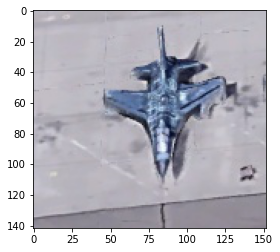

In [77]:
# Jsut checking some imgage files

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

show_example(*dataset[10])

In [78]:
# Docking with Jovian

!pip install jovian --upgrade -q

In [ ]:
# Save to my Jovian

import jovian
jovian.utils.colab.set_colab_file_id('1duI5PDJrk6rVCUGHDeKbEp32rCzYw9Rg')

jovian.commit(project=project_name)

Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.


In [90]:
random_seed = 3
torch.manual_seed(random_seed);

In [91]:
# Had to change below val_size because my test files only have 12. So having 12 images for all val_ds would have 
# 0 train_ds. It would get num_samples=0

val_size = 6
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(6, 6)

In [92]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


We can now create data loaders for training and validation, to load the data in batches

In [93]:
from torch.utils.data.dataloader import DataLoader

batch_size=3

In [94]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

We can look at batches of images from the dataset using the make_grid method from torchvision. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [96]:
from torchvision.utils import make_grid

def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means


def show_batch_test(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:10], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

# Got an error. Let me skip this function for now
show_batch(train_dl) 

RuntimeError: ignored

In [61]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/myelife/dimi-course-project-aircraft


'https://jovian.ai/myelife/dimi-course-project-aircraft'

**Defining the Model (Convolutional Neural Network)**

In [62]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [63]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [64]:
import torch.nn as nn
import torch.nn.functional as F

In [65]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [67]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

NameError: ignored

Need to troubleshoot "stack expects each tensor to be equal size"

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/collate.py", line 83, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/collate.py", line 83, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 271, 284] at entry 0 and [3, 128, 128] at entry 1

In [100]:
jovian.utils.colab.set_colab_file_id('1duI5PDJrk6rVCUGHDeKbEp32rCzYw9Rg')

jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/myelife/dimi-course-project-aircraft


'https://jovian.ai/myelife/dimi-course-project-aircraft'